### imports 

In [12]:
# can use:  !pip install seaborn  instead of using terminal

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
#load dataset
import os

df= pd.read_csv(os.path.join(os.getcwd(), 'Advertising.csv'))

In [16]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [22]:
# Drop unmportant columns
df.drop(columns=['Unnamed: 0'], axis =1, inplace=True)

In [27]:
#check
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### EDA

In [23]:
df.shape

(200, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
# statical summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [26]:
# check for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# if missing values, fill or drop them   
# multiple ways to fill missing values:

# 1. Fill numeric columns with mean or median

# 2. Fill categorical column with mode

# 3. Forward fill or Backward fill (useful for time series)

# 4. KNN imputation (on numeric only)

In [28]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [29]:
# if there are duplicates, drop them
# df.drop_duplicates(inplace=True)

### Data Visualization

In [30]:
# new column(feature extraction)
df['Total_Ads'] = df['TV'] + df['Radio'] + df['Newspaper']
# check new column
df.head()

,TV,Radio,Newspaper,Sales,Total_Ads
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [ ]:
# arrange columns
df = df[['TV', 'Radio', 'Newspaper', 'Total_Ads', 'Sales']]

df.head()

,TV,Radio,Newspaper,Total_Ads,Sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


#### bivariate vizualizations

<Axes: xlabel='Total_Ads', ylabel='Sales'>

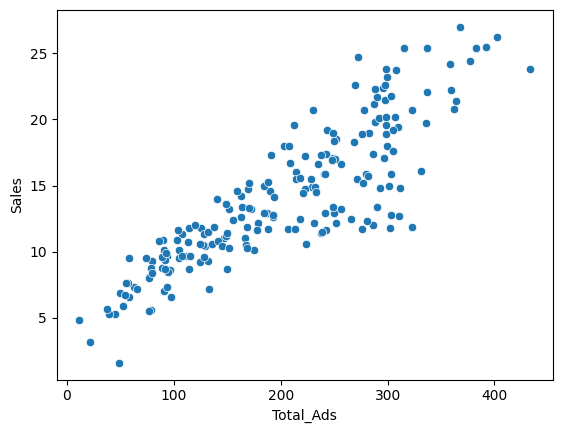

In [ ]:
sns.scatterplot(x='Total_Ads', y='Sales', data=df)

Pair Plot ->  Get relations between each two features

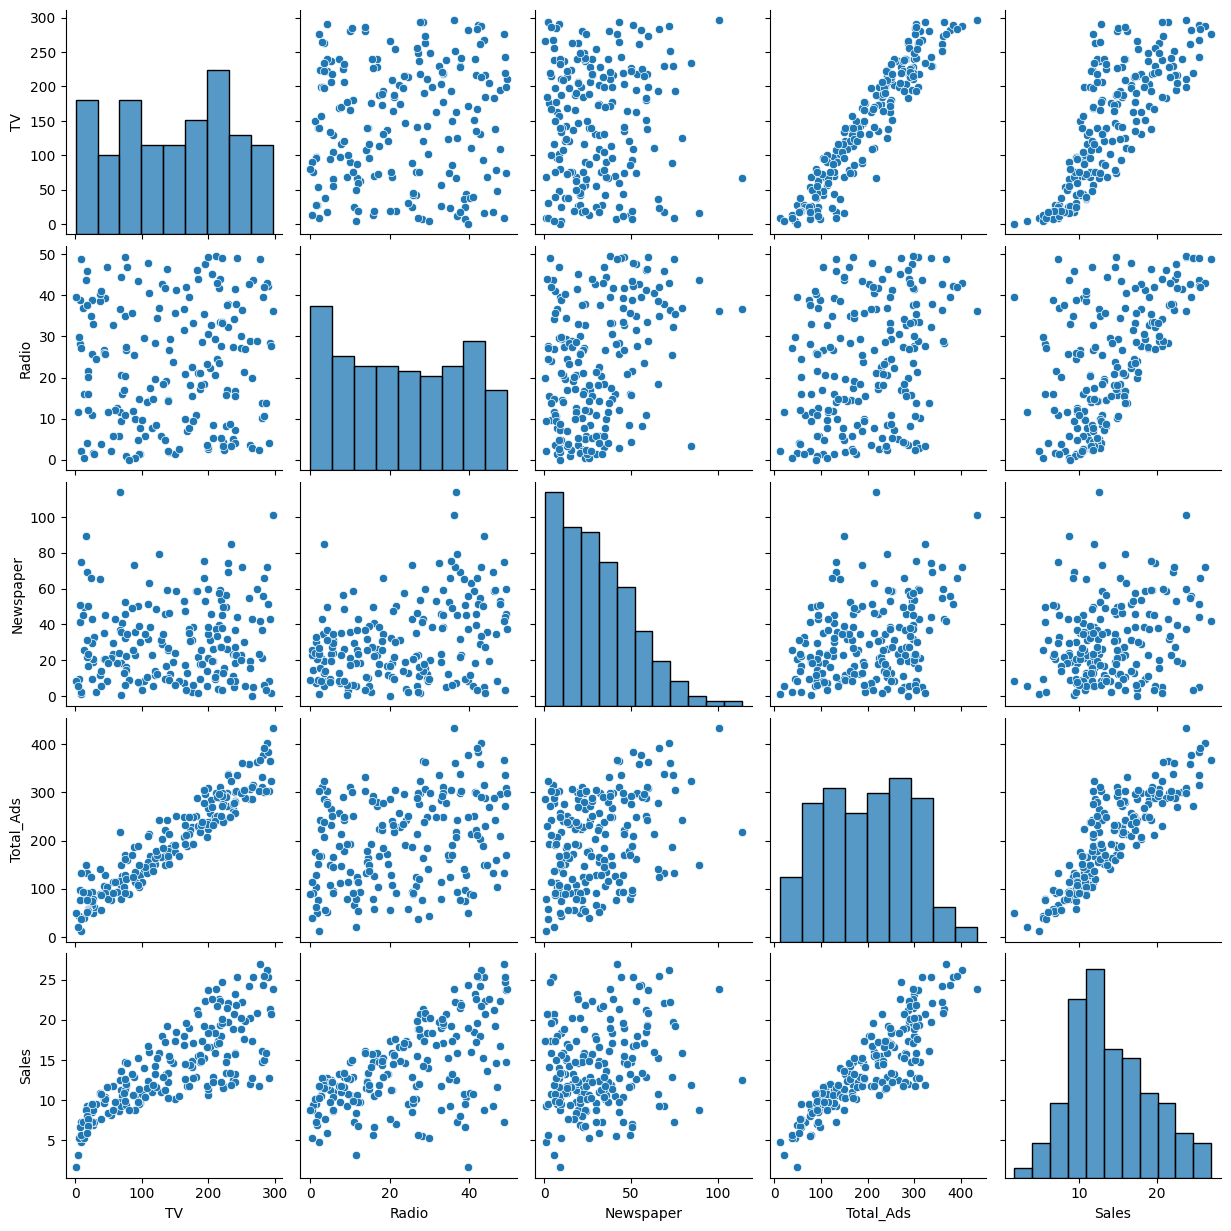

In [35]:
sns.pairplot(df)

#### Correlation Matrix -> check on contribution of each feature in target

`Note:`

- Features should have low correlation with each other to avoid multicollinearity.

- Features should have high correlation with the target variable to be considered useful.

If a feature has high correlation with other features or low correlation with the target, it may be a good candidate for removal.

<Axes: >

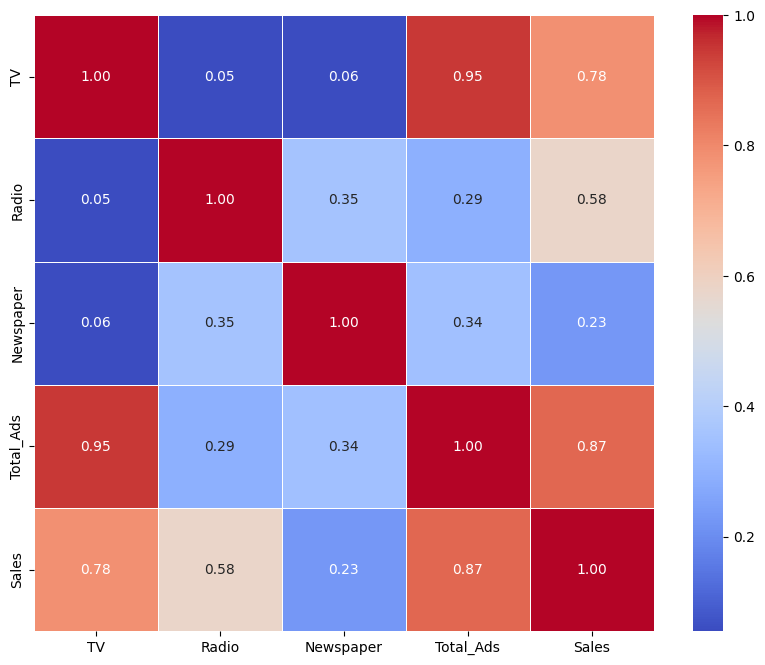

In [38]:
corr= df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


### preprocessing

In [ ]:
# delete total ads column (no more needed)
df.drop(columns=['Total_Ads'], axis=1, inplace=True)

In [42]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
# check range of values
df.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [45]:
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [47]:
df.describe() # for more statical details

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# no need for scalling as all values are in the similar ranges

# note that scaling is not always necessary for linear regression, but it can help with convergence and interpretation, especially when features have different units or scales. 
# Common types of scaling:

# 1. Standardization (Z-score normalization):
#    - Centers the data to have a mean of 0 and a standard deviation of 1.
#    - Useful when features have different units or scales.
# 2. Min-Max Scaling:
#    - Scales the data to a fixed range, usually [0, 1].
#    - Useful when you want to preserve the relationships between the features.
# 3. Robust Scaling:
#    - Centers the data using the median and scales it using the interquartile range (IQR).
#    - Useful when the data contains outliers.

### Splitting

In [48]:
X = df.drop(columns=['Sales'], axis=1)   # feature variables
y = df['Sales']    # target variable

In [49]:
# check on new X and y
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
# !pip install scikit-learn   uncomment if not installed

In [ ]:
# split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # MUST use random_state for reproducibility (each time you run the code, you will get the same sets)

In [53]:
# check on new sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


### Apply Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model 
lr_model = LinearRegression()

# Fit the model to the training data (both features and taget are given as it's supervised learning)
lr_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [58]:
# test (predict) the model on the testing data (only features are given)
y_pred = lr_model.predict(X_test) 

In [63]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.flatten()  # flatten in case y_pred is 2D
})

# Show the first 10 rows
print(comparison.head(10))

   Actual  Predicted
0    16.9  16.408024
1    22.4  20.889882
2    21.4  21.553843
3     7.3  10.608503
4    24.7  22.112373
5    12.6  13.105592
6    22.3  21.057192
7     8.4   7.461010
8    11.5  13.606346
9    14.9  15.155070


In [ ]:
# Evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Note:

# - Mean Absolute Error (MAE) is the average of the absolute differences between actual and predicted values.
#   It gives an idea of how far off the predictions are from the actual values, without considering the direction of the errors.
#   Lower values indicate better model performance.

# - Mean Squared Error (MSE) is a measure of the average of the squares of the errors—that is, the average squared difference between
#   the actual and predicted values. It penalizes larger errors more than smaller ones, making it sensitive to outliers.
#   Lower values indicate better model performance.

# - R2-score (R²) is a measure of how well the model explains the variance in the target variable.
#   It ranges from 0 to 1, with higher values indicating better model performance.

Evaluation Metrics:
Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [69]:
# root mean squared error (RMSE) is the square root of MSE, which gives the error in the same units as the target variable.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.78159966153345


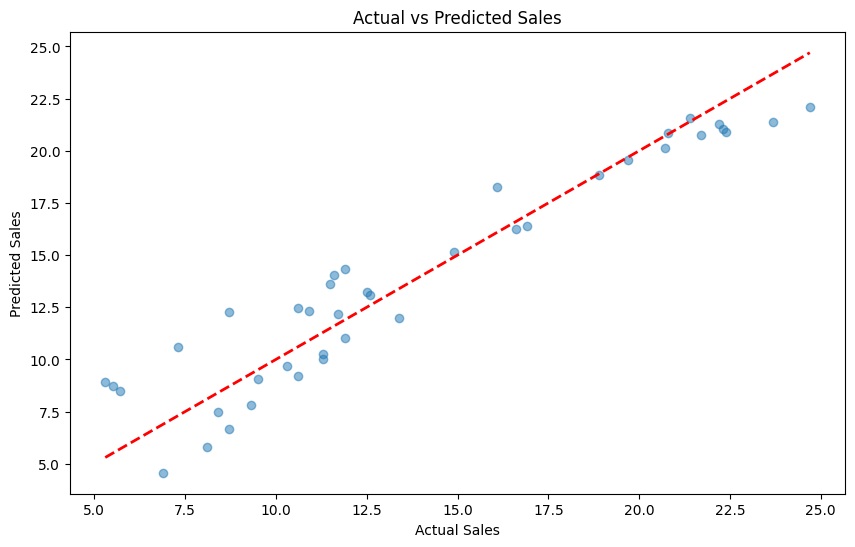

In [68]:
# Visualize the result

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()